In [13]:
# Hanoch Gidron (חנוך גדרון)

In [14]:
import nltk
import pandas as pd
from matplotlib import pyplot as plt
import re
import numpy as np

# Research Question:
* Can analyzing judges opinions help us make decisions as we are being sentenced by them?
* Could we retrieve meaningful information about judges before meeting them in court?

# Dataset includes USA supreme court opinions (decisions and verdicts) since 1970 until today, by judge
it is available here: https://www.kaggle.com/datasets/gqfiddler/scotus-opinions

In [15]:
df = pd.read_csv('ussupreme/opinions_since_1970.csv')

In [16]:
df['text'] = df['text'].apply(lambda x:re.sub(r'\s+', ' ', x).lower().replace('\xad ',''))
df.rename(columns={'author_name':'judge'}, inplace=True)
df = df[['judge', 'category', 'per_curiam', 'case_name', 'date_filed',
        'year_filed',
        'scdb_votes_majority', 'scdb_votes_minority',
       'text']]
df['length'] = df['text'].str.len()
# there are many short opinions which are not very informative
df = df.loc[(df.length> 3000)] 
df.head(5)

,judge,category,per_curiam,case_name,date_filed,year_filed,scdb_votes_majority,scdb_votes_minority,text,length
0,Justice Roberts,majority,False,McCutcheon v. Federal Election Comm'n,2014-04-02,2014,5.0,4.0,there is no right more basic in our democracy ...,78142
1,Justice Thomas,concurring,False,McCutcheon v. Federal Election Comm'n,2014-04-02,2014,5.0,4.0,i adhere to the view that this court’s decisio...,9545
2,Justice Breyer,dissenting,False,McCutcheon v. Federal Election Comm'n,2014-04-02,2014,5.0,4.0,"nearly 40 years ago in buckley v. valeo, 424 u...",58919
3,Justice Kagan,majority,False,Kaley v. United States,2014-02-25,2014,NaN,NaN,"a federal statute, 21 u.s. c. §853(e), authori...",42937
4,Justice Roberts,dissenting,False,Kaley v. United States,2014-02-25,2014,NaN,NaN,an individual facing serious criminal charges ...,35858


# Data Explanation

### Columns:
* Judge == name of the judge who wrote the opinion
* Per Curiam == by decision of a judge, or of a court in unanimous agreement.
* Case name might appear few times, since many times judges in same case have different opinions
* Votes majority/minority == how many voted with the opinion that was agreed upon

### Categories:
* majority: the majority opinion is the opinion of the court that is supported by the most judges. It represents the official decision of the court in the case.

* concurring: a concurring opinion is written by a judge who agrees with the majority opinion, but for different reasons. This type of opinion is not necessary to the decision of the case, but can provide additional context or reasoning.

* dissenting: a dissenting opinion is written by a judge who disagrees with the majority opinion. This type of opinion provides an alternative perspective on the case, but is not part of the official decision of the court.

* second_dissenting: a second dissenting opinion is similar to a dissenting opinion, but is written by a second judge who disagrees with the majority opinion.

Data does not include case result (e.g. guilty or not guilty)

In [17]:
# example for an opinion text
cell_val = df.iloc[2]['text']
cell_val[:1000]

'nearly 40 years ago in buckley v. valeo, 424 u.s. 1 (1976) (per curiam), this court considered the constitutionality of laws that imposed limits upon the overall amount a single person can contribute to all federal candidates, political parties, and committees taken together. the court held that those limits did not violate the constitution. id., at 38; accord, mcconnell v. federal election comm’n, 540 u.s. 93, 138, n. 40, 152–153, n. 48 (2003) (citing with approval buckley’s aggregate limits holding). the buckley court focused upon the same problem that concerns the court today, and it wrote: “the overall $25,000 ceiling does impose an ultimate restriction upon the number of candidates and committees with which an individual may associate himself by means of financial support. but this quite modest restraint upon protected political activity serves to prevent evasion of the $1,000 contribution limitation by a person who might otherwise contribute massive amounts of money to a particu

In [18]:
# Get basic statistics for numerical columns
print(df.describe())

        year_filed  scdb_votes_majority  scdb_votes_minority         length
count  9406.000000          9050.000000          9050.000000    9406.000000
mean   1990.976398             6.774475             2.028508   21840.175314
std      14.031743             1.508245             1.515115   16629.429738
min    1970.000000             4.000000             0.000000    3005.000000
25%    1979.000000             5.000000             0.000000   10897.500000
50%    1988.000000             7.000000             2.000000   18353.500000
75%    2002.000000             8.000000             3.000000   28240.000000
max    2020.000000             9.000000             4.000000  425264.000000


In [19]:
# Get the number of unique values in each column
print(df.nunique())

judge                    33
category                  5
per_curiam                2
case_name              5097
date_filed             1845
year_filed               51
scdb_votes_majority       6
scdb_votes_minority       5
text                   9275
length                 8276
dtype: int64


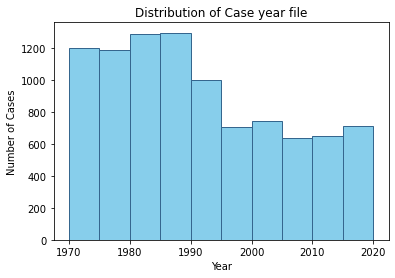

In [20]:
# what decades consist of most data
plt.hist(df['year_filed'],color = "skyblue", ec=(0.207563, 0.398559, 0.556926), lw=1)
# plt.barh(yearly_avg.index, yearly_avg.values, label='Average Length', color=viridis_colors)

plt.title('Distribution of Case year file')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

#  Exploratory Data Analysis

### Length of opinions - as time goes by, opinions are getting longer

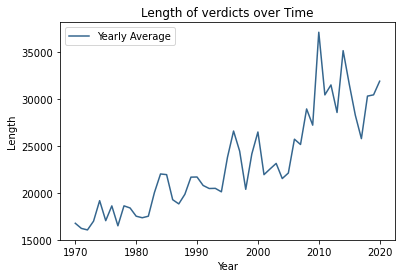

In [21]:
yearly_avg = df.groupby(df['year_filed'])['length'].mean()

# plot the yearly averages on the same graph
plt.plot(yearly_avg.index, yearly_avg.values, label='Yearly Average', linestyle='-', color= (0.207563, 0.398559, 0.556926))

# customize the plot
plt.title('Length of verdicts over Time')
plt.xlabel('Year')
plt.ylabel('Length')
plt.legend()
plt.show()

In [22]:
df["per_curiam"] = df["per_curiam"].astype(int)

# Continuous reduction at Per Curiam Decisions
Per Curiam == by decision of a judge, or of a court in unanimous agreement.

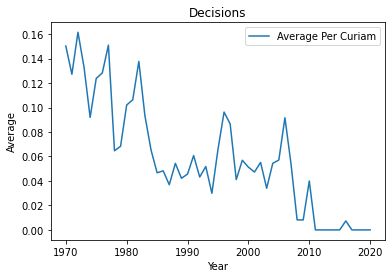

In [23]:
yearly_avg = df.groupby(df['year_filed'])[['per_curiam']].mean()

plt.plot(yearly_avg.index, yearly_avg.per_curiam, label='Average Per Curiam')
plt.title('Decisions')
plt.xlabel('Year')
plt.ylabel('Average')
plt.legend()
plt.show()

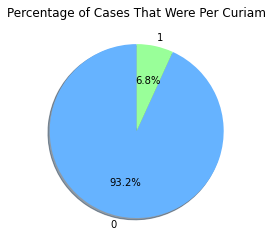

In [24]:
# Plot a pie chart of the percentage of cases that were per curiam - in general
per_curiam_counts = df['per_curiam'].value_counts()
colors = ['#66b3ff','#99ff99','#ffcc99']
plt.pie(per_curiam_counts.values, labels=per_curiam_counts.index, autopct='%1.1f%%', colors=colors,shadow=True, startangle=90)
plt.title('Percentage of Cases That Were Per Curiam')
plt.show()

# Judges Statistics

In [25]:
# Filter out judges with less than 400 cases
judge_groups = df.groupby('judge')
filtered_groups = judge_groups.filter(lambda x: len(x) >= 200)
filtered_groups.head(3)

,judge,category,per_curiam,case_name,date_filed,year_filed,scdb_votes_majority,scdb_votes_minority,text,length
1,Justice Thomas,concurring,0,McCutcheon v. Federal Election Comm'n,2014-04-02,2014,5.0,4.0,i adhere to the view that this court’s decisio...,9545
2,Justice Breyer,dissenting,0,McCutcheon v. Federal Election Comm'n,2014-04-02,2014,5.0,4.0,"nearly 40 years ago in buckley v. valeo, 424 u...",58919
5,Justice Kennedy,majority,0,"Masterpiece Cakeshop, Ltd. v. Colorado Civil R...",2018-06-13,2018,NaN,NaN,in 2012 a same-sex couple visited masterpiece ...,34965


In [26]:
filtered_groups = filtered_groups.loc[(filtered_groups.judge != 'per_curiam')] # don't get per_curiam as judge name

### Observe at average opinion length for judges

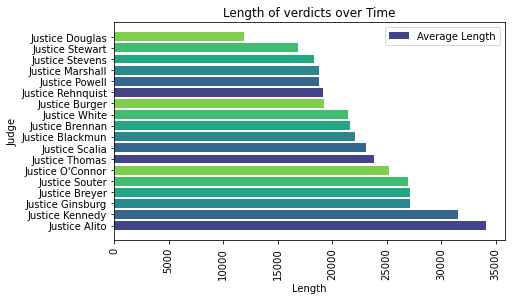

In [27]:
yearly_avg = filtered_groups.groupby(filtered_groups['judge'])['length'].mean().sort_values(ascending=False)
# yearly_avg_sorted = yearly_avg.sort_values(ascending=False)

viridis_colors = [           (0.254957, 0.265737, 0.529412),    (0.207563, 0.398559, 0.556926),    (0.164055, 0.530221, 0.554772),    (0.128719, 0.660553, 0.511908),    (0.251941, 0.743099, 0.443191),    (0.502419, 0.812918, 0.298065)]
plt.figure(figsize=(7, 4))

plt.barh(yearly_avg.index, yearly_avg.values, label='Average Length', color=viridis_colors)

plt.title('Length of verdicts over Time')
plt.xlabel('Length')
plt.xticks(rotation=90)
plt.ylabel('Judge')
plt.legend()
plt.show()

# Representation of each opinion category by judge

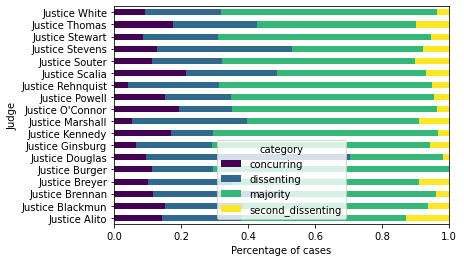

In [28]:
import matplotlib.pyplot as plt

pivot_df = pd.pivot_table(filtered_groups[['judge','category']], index='judge', columns='category', aggfunc=len, fill_value=0)

total_cases = pivot_df.sum(axis=1)

percentage_df = pivot_df.divide(total_cases, axis=0)

percentage_df.plot(kind='barh', stacked=True, colormap='viridis')

plt.xlim((0, 1))
plt.ylabel('Judge')
plt.xlabel('Percentage of cases')
plt.show()

Interesting to see some judges are never in second dissent,
and some has a pretty low majority cases rate, like Justice Douglas

# Modeling

# Identify category

Since we don't have labelled data, we added a category for Federal Criminal Law cases, which can be derived from the "case_name" column (if United States is a side to the process, together with the word "offence" included, it is very likely to be a federal criminal law case.) 
Using Keras, we built a model to predict the correct category.

In [29]:
df_criminal = df[['judge', 'case_name', 'text']]
df_criminal['fed_crime'] = (((df_criminal['case_name'].str.startswith('United States v.')) | 
                (df_criminal['case_name'].str.endswith('v. United States'))) & df_criminal['text'].str.contains('offense')).astype(int)
df_criminal.head(5)

C:\Users\Gidi\AppData\Local\Temp/ipykernel_9716/2164146645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_criminal['fed_crime'] = (((df_criminal['case_name'].str.startswith('United States v.')) |


,judge,case_name,text,fed_crime
0,Justice Roberts,McCutcheon v. Federal Election Comm'n,there is no right more basic in our democracy ...,0
1,Justice Thomas,McCutcheon v. Federal Election Comm'n,i adhere to the view that this court’s decisio...,0
2,Justice Breyer,McCutcheon v. Federal Election Comm'n,"nearly 40 years ago in buckley v. valeo, 424 u...",0
3,Justice Kagan,Kaley v. United States,"a federal statute, 21 u.s. c. §853(e), authori...",1
4,Justice Roberts,Kaley v. United States,an individual facing serious criminal charges ...,1


In [30]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 1000
MAX_WORDS = 20000

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df_criminal['text'])
sequences = tokenizer.texts_to_sequences(df_criminal['text'])
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 193334 unique tokens.


In [31]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = pd.get_dummies(df_criminal['fed_crime']).values
print(f'Shape of data tensor: {data.shape}')
print(f'Shape of label tensor: {labels.shape}')

Shape of data tensor: (9406, 1000)
Shape of label tensor: (9406, 2)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Model has good results in identifying criminal-law cases

Epoch 1/5
236/236 [==============================] - 3s 8ms/step - loss: 182.3571 - accuracy: 0.8566 - val_loss: 9.6692 - val_accuracy: 0.9155
Epoch 2/5
236/236 [==============================] - 2s 6ms/step - loss: 8.9367 - accuracy: 0.8607 - val_loss: 0.5418 - val_accuracy: 0.8640
Epoch 3/5
236/236 [==============================] - 2s 8ms/step - loss: 2.3603 - accuracy: 0.8785 - val_loss: 0.4800 - val_accuracy: 0.9235
Epoch 4/5
236/236 [==============================] - 2s 8ms/step - loss: 1.2610 - accuracy: 0.9010 - val_loss: 0.3928 - val_accuracy: 0.9299
Epoch 5/5
236/236 [==============================] - 2s 8ms/step - loss: 0.6964 - accuracy: 0.9140 - val_loss: 0.3310 - val_accuracy: 0.9304


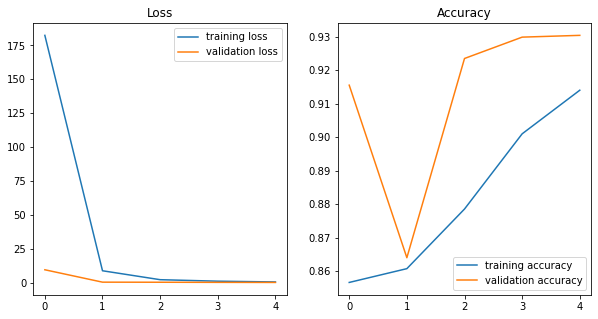

Test loss: 0.33096396923065186
Test accuracy: 0.9303932189941406


In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(MAX_SEQUENCE_LENGTH,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(labels.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy')
ax2.legend()

plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [34]:
# most epochs weren't needed
# there was a minor loss decrease after the first and second epochs
# accuracy improved strongly after second epoch

### Adding layer and neurons parameters, change dropout

Epoch 1/3
236/236 [==============================] - 5s 15ms/step - loss: 199.7382 - accuracy: 0.8549 - val_loss: 29.5305 - val_accuracy: 0.9261
Epoch 2/3
236/236 [==============================] - 4s 15ms/step - loss: 36.4942 - accuracy: 0.8522 - val_loss: 10.0286 - val_accuracy: 0.9139
Epoch 3/3
236/236 [==============================] - 4s 16ms/step - loss: 14.1562 - accuracy: 0.8454 - val_loss: 1.6406 - val_accuracy: 0.9251


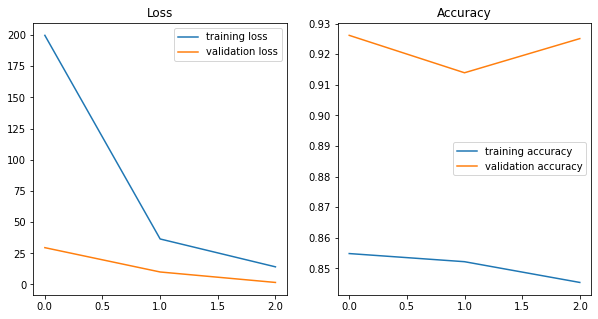

Test loss: 1.64060378074646
Test accuracy: 0.9250797033309937


In [71]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(MAX_SEQUENCE_LENGTH,)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(labels.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy')
ax2.legend()

plt.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Sentiment Analysis

In [35]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('vader_lexicon')

# How each judge tend to address defendants?
we will try to see if there are sentiment differences between judges

### Get only opinions that mention "defendant" three or more times

In [36]:
df_defendants = filtered_groups[filtered_groups["text"].str.count("defendant") >= 3][['judge','text']]

df_defendants.head()

,judge,text
18,Justice White,new york general municipal law §§ 103-a and 10...
19,Justice Douglas,this is a direct appeal under § 2 of the exped...
21,Justice Ginsburg,"this case concerns options open to plaintiffs,..."
23,Justice Blackmun,in this case we are concerned with an employer...
25,Justice Burger,we granted certiorari in this case to determin...


## Pick an opinion for example

In [37]:
# select a criminal opinion out of the dataset
cell_val = df_defendants.iloc[12]['text']

In [38]:
from nltk.corpus import stopwords
import re
import string


text = cell_val

stop_words = set(stopwords.words('english'))
tokens = text.split()
filtered_text = [token for token in tokens if not token in stop_words]
filtered_text = ' '.join(filtered_text)
sentences = nltk.sent_tokenize(text)
# choose sentences with the word "defendant" to get sentiment regarding defendants
defendant_sentences = [sentence for sentence in sentences if "defendant" in sentence]

# print first three sentences
print(defendant_sentences[:3])


['the aggravating factor relevant here is: "[t]he defendant committed the murder by intentionally killing the victim while committing or attempting to commit.', 'the trial court found that the state had proved beyond a reasonable doubt that "[t]he defendant committed the murder by intentionally killing the victim while committing or attempting to commit .', 'the indiana supreme court held that "[felony murder] is not an included offense of [murder] and where the jury, as in the instant case, finds the defendant guilty of one of the types of murder and remains silent on the other, it does not operate as an acquittal of the elements of the type of murder the jury *228 chose not to consider."']


### Observe each sentence and its sentiment score in our example

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

sentiment_scores = []

for sentence in defendant_sentences:
    score = sia.polarity_scores(sentence)['compound']
    sentiment_scores.append({'Sentence': sentence, 'Sentiment Score': score})

df_tmp = pd.DataFrame(sentiment_scores)
# set column width to be larget so we can read the whole sentence
pd.set_option('display.max_colwidth', 1000)
df_tmp

,Sentence,Sentiment Score
0,"the aggravating factor relevant here is: ""[t]he defendant committed the murder by intentionally killing the victim while committing or attempting to commit.",-0.8689
1,"the trial court found that the state had proved beyond a reasonable doubt that ""[t]he defendant committed the murder by intentionally killing the victim while committing or attempting to commit .",-0.8779
2,"the indiana supreme court held that ""[felony murder] is not an included offense of [murder] and where the jury, as in the instant case, finds the defendant guilty of one of the types of murder and remains silent on the other, it does not operate as an acquittal of the elements of the type of murder the jury *228 chose not to consider.""",-0.8343
3,"the court of appeals also concluded that collateral estoppel was not implicated since ""the defendant must show that the jury's verdict actually and necessarily determined the issue he seeks to foreclose"" and ""schiro's conviction for murder/rape did not act as an acquittal with respect to the pure murder charge as a matter of state law.""",0.1280
4,these protections stem from the underlying premise that a defendant should not be twice tried or punished for the same offense.,-0.6124
5,"the clause operates as a ""bar against repeated attempts to convict, with consequent subjection of the defendant to embarrassment, expense, anxiety, and insecurity, and the possibility that he may be found *230 guilty even though innocent.""",-0.8481
6,"when a defendant has been acquitted, the ""clause guarantees that the state shall not be permitted to make repeated attempts to convict him.""",0.2500
7,"in stroud v. united states, 251 u.s. 15, 17-18 (1919), we held that where a defendant's murder conviction was overturned on appeal, the defendant could be resentenced after retrial.",-0.5719
8,"similarly, we found no constitutional infirmity in holding a second sentencing hearing where the first sentence was improperly based on a prior conviction for which the defendant had been pardoned.",-0.1531
9,"we have also upheld the use of prior convictions to enhance sentences for subsequent convictions, even though this means a defendant must, in a certain sense, relitigate in a *231 sentencing proceeding conduct for which he was previously tried.",0.1779


In [40]:
# reset pandas settings
pd.reset_option('display.max_colwidth')

### Find out the average sentiment scores for the example text

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in defendant_sentences]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

positive_threshold = 0.05
positive_count = sum(score >= positive_threshold for score in sentiment_scores)
positive_proportion = positive_count / len(sentiment_scores)

print(f"Average sentiment score: {average_sentiment:.2f}")
print(f"Proportion of positive sentences: {positive_proportion:.2f}")


Average sentiment score: -0.31
Proportion of positive sentences: 0.33


### create a function that performs the process on given text

In [42]:
from nltk.corpus import stopwords
import re
import string


def sentiment_score(text, entity):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_text = [token for token in tokens if not token in stop_words]
    filtered_text = ' '.join(filtered_text)
    sentences = nltk.sent_tokenize(text)
    defendant_sentences = [sentence for sentence in sentences if entity in sentence]
    
    sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in defendant_sentences]
    average_sentiment = sum(sentiment_scores) / (len(sentiment_scores)+0.001)
    
    positive_threshold = 0.05
    positive_count = sum(score >= positive_threshold for score in sentiment_scores)
    positive_proportion = positive_count / (len(sentiment_scores)+0.001)
    
    return round(average_sentiment,2), round(positive_proportion,2)

In [43]:
sentiment_score(cell_val, "defendant")

(-0.31, 0.33)

# Apply the sentiment analysis function on the defendants dataset

In [44]:
df_defendants[["sentiment_score_defendant", 'positive_p_defendant']] = df_defendants["text"].apply(lambda x: pd.Series(sentiment_score(x, 'defendant')))
df_defendants

,judge,text,sentiment_score_defendant,positive_p_defendant
18,Justice White,new york general municipal law §§ 103-a and 10...,0.57,1.00
19,Justice Douglas,this is a direct appeal under § 2 of the exped...,-0.03,0.00
21,Justice Ginsburg,"this case concerns options open to plaintiffs,...",-0.19,0.22
23,Justice Blackmun,in this case we are concerned with an employer...,0.24,0.67
25,Justice Burger,we granted certiorari in this case to determin...,-0.14,0.17
...,...,...,...,...
10961,Justice Thomas,we decide today whether a civil rights plainti...,0.28,0.73
10962,Justice O'Connor,if ever there was a plaintiff who deserved no ...,0.04,0.37
10967,Justice O'Connor,"""opportunity doesn't always knock . . . someti...",0.40,1.00
10981,Justice Blackmun,this case presents the issue whether a defenda...,-0.44,0.11


# Some judges are negative towards defendants, in compare to others
We also see all judges are in general tend to be negative towards defendants, but not too much (between 0 and -0.3)

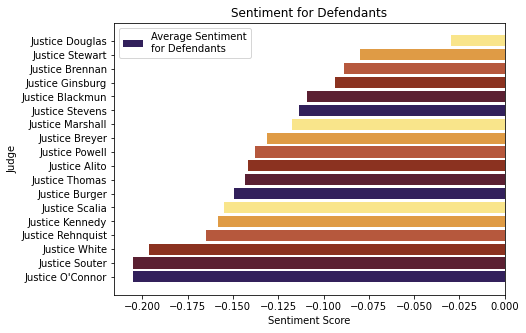

In [45]:
judge_avg = df_defendants.groupby(df_defendants['judge'])['sentiment_score_defendant'].mean().sort_values(ascending=True)

purple_haze_colors = [(0.196, 0.125, 0.357), (0.357, 0.125, 0.196), (0.545, 0.196, 0.125), 
                      (0.714, 0.345, 0.239), (0.875, 0.608, 0.271), (0.976, 0.898, 0.545)]
plt.figure(figsize=(7, 5))

plt.barh(judge_avg.index, judge_avg.values, color=purple_haze_colors)

plt.title('Sentiment for Defendants')
plt.xlabel('Sentiment Score')
# plt.xticks(rotation=90)
plt.ylabel('Judge')
plt.legend(['Average Sentiment\nfor Defendants'], loc='upper left')
plt.show()

### Statistics on average % of Positive Sentences doesn't show a major difference
However, it is highly correlated with average sentiment

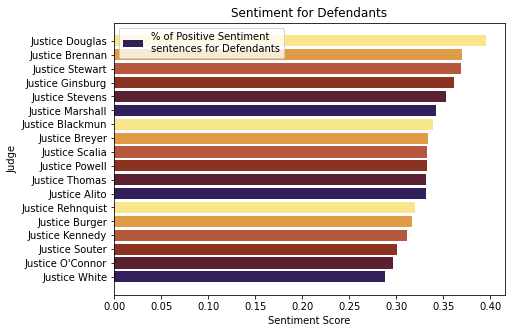

In [46]:
judge_avg = df_defendants.groupby(df_defendants['judge'])['positive_p_defendant'].mean().sort_values(ascending=True)
# yearly_avg_sorted = yearly_avg.sort_values(ascending=False)
plt.figure(figsize=(7, 5))

plt.barh(judge_avg.index, judge_avg.values, color=purple_haze_colors)

plt.title('Sentiment for Defendants')
plt.xlabel('Sentiment Score')
# plt.xticks(rotation=90)
plt.ylabel('Judge')
plt.legend(['% of Positive Sentiment\nsentences for Defendants'], loc='upper left')
plt.show()

# We can look at the numbers from earlier to see how involved is the judge in criminal law
It can be effective to consider mixing civil law claims if we are trialed in front of this judge

In [47]:
judge_groups = df_criminal.groupby('judge')

# Filter out judges with less than 200 cases
filtered_criminal = judge_groups.filter(lambda x: len(x) >= 200)

no major differences in supreme court judges:

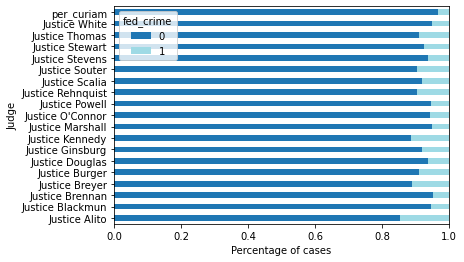

In [68]:
pivot_df = pd.pivot_table(filtered_criminal[['judge','fed_crime']], index='judge', columns='fed_crime', aggfunc=len, fill_value=0)

total_cases = pivot_df.sum(axis=1)

percentage_df = pivot_df.divide(total_cases, axis=0)

percentage_df.plot(kind='barh', stacked=True, colormap='tab20')
plt.xlim((0, 1))
plt.ylabel('Judge')
plt.xlabel('Percentage of cases')
plt.show()

# Judges similarities
Does every judge have a unique writing style and could be identified?

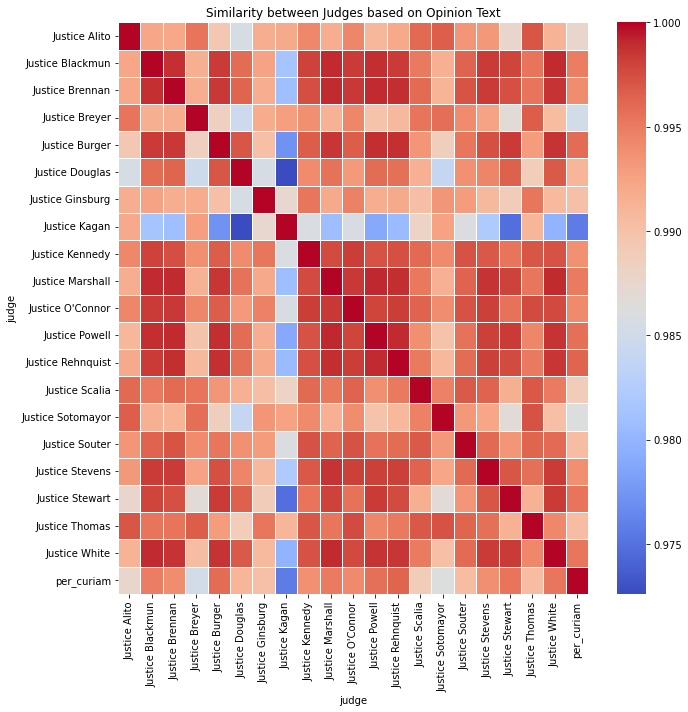

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Filter out judges with less than 100 cases
extra_filtered_groups = judge_groups.filter(lambda x: len(x) >= 100)
extra_filtered_groups=extra_filtered_groups.groupby('judge')['text'].agg(' '.join).reset_index()
# use only 50 rows to be able to see results in a heatmap
# extra_filtered_groups = extra_filtered_groups.head(50)
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(extra_filtered_groups['text'])

cosine_similarities = cosine_similarity(tfidf_matrix)

similarity_df = pd.DataFrame(cosine_similarities, columns=extra_filtered_groups['judge'], index=extra_filtered_groups['judge'])

plt.figure(figsize=(10, 10))
sns.heatmap(similarity_df, cmap='coolwarm', linewidths=.5)

plt.title('Similarity between Judges based on Opinion Text')
plt.tight_layout()

plt.show()


### It seems like some judges are similar to other in their opinions

# Conclusions
* We can somehow identify sentiment differences upon defendants, and judges has difference in sentiment (however we are not sure if has effect on decision result
* Text modelling can divide criminal cases from other cases, and with labelled data it is maybe possible to differ other cases category (contracts, torts etc.)
* There are some similarities between judges semantics that can be identified using tf-idf cosine similarity
